In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import datetime
import locale
locale.setlocale(locale.LC_ALL, 'ru_RU.UTF-8')

'ru_RU.UTF-8'

In [134]:
# pip install nltk

In [135]:
import nltk
# nltk.download()

In [136]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('russian')

In [137]:
df = pd.read_excel('data/asu_zm_4_23.xls')


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49965 entries, 0 to 49964
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Номер пакета ЗМ                             49965 non-null  int64  
 1   номер инцидента                             37091 non-null  float64
 2   Дата нарушения                              49965 non-null  object 
 3   Состояние пакета: состояние ЗМ              49965 non-null  object 
 4   Ответственное предпр.                       49965 non-null  object 
 5   Станция_1                                   49965 non-null  object 
 6   Станция_2                                   29865 non-null  object 
 7   Км                                          49965 non-null  int64  
 8   Пк                                          49965 non-null  int64  
 9   Путь                                        49965 non-null  object 
 10  Поезд     

In [139]:
display(df.head())

,Номер пакета ЗМ,номер инцидента,Дата нарушения,Состояние пакета: состояние ЗМ,Ответственное предпр.,Станция_1,Станция_2,Км,Пк,Путь,Поезд,Табельный номер машиниста,ФИО машиниста,Колонна,Локомотив,Тип замечания,Предприятие ввода,Предприятие приписки бригады/очевидца,Дата ввода подтвержденного ответа в пакете,Источник замечания
0,1,2.0,2,3,4,5,6,7,8,9,10.0,11,12,13.0,14,15,16,17,18,19
1,9128446,NaN,04.10.2023 13:41,Пакет отвечен: ЗМ отвечен,ПЧ-17 НИЖНИЙ ТАГИЛ (76),СТАРАТЕЛЬ,НИЖНИЙ ТАГИЛ,367,3,"Путь перегона НИЖНИЙ ТАГИЛ - СТАРАТЕЛЬ, 2 - 76",2840.0,28041,Кузеванов Евгений Георгиевич,7.0,ВЛ11 №366[0366A/0366Б/0367Б],Нахождение в междупутье (кроме междупутья на т...,ТЧЭ-1 СМЫЧКА (76),ТЧЭ-1 СМЫЧКА (76),19.12.2023 07:13,ТУ-137
2,8690515,308005938.0,15.10.2023 22:28,Пакет отвечен: ЗМ отвечен,ПЧ-4 ЛЕВШИНО (76),ЯРИНО,ДИВЬЯ,47,8,"Путь перегона ДИВЬЯ - ЯРИНО, 1 - 76",3057.0,4546,Шумков Иван Николаевич,NaN,ВЛ11 №97[0097A/0097Б/0289A/0289Б],Отсутствие сигнальных или путевых знаков,ТЧЭ-9 БЕРЕЗНИКИ (76),ТЧЭ-9 БЕРЕЗНИКИ (76),03.11.2023 06:55,ТУ-137
3,8689130,NaN,15.10.2023 20:53,Пакет отвечен: ЗМ отвечен,ДЦУП ЕКАТЕРИНБУРГ (76),СЕДЕЛЬНИКОВО,NaN,64,1,"ГП СЕДЕЛЬНИКОВО, Хрустальная-Косулино 2 - 76",2028.0,70032,Куликов Сергей Владимирович,11.0,2ЭС6 №1092[1092A/1092Б],"Нарушение технологии, вызвавшее несоблюдение с...",ТЧЭ-15 КАМЕНСК-УРАЛЬСКИЙ (76),ТЧЭ-15 КАМЕНСК-УРАЛЬСКИЙ (76),18.10.2023 06:53,ТУ-137
4,8687371,NaN,15.10.2023 18:02,Пакет отвечен: ЗМ отвечен,ДЦУП ЕКАТЕРИНБУРГ (76),СИПАВС ПРУДЫ,NaN,25,7,"ГП РАЗЪЕЗД № 1, Каменск-Уральский-Чурилово 2 - 76",2254.0,5472,Филимонов Дмитрий Борисович,13.0,ВЛ10К №1350[1350A/1350Б],Задержка поезда у входного светофора,ТЧЭ-2 ЧЕЛЯБИНСК (80),ТЧЭ-2 ЧЕЛЯБИНСК (80),18.10.2023 06:44,ТУ-137


In [140]:
# Объединяем данные из колонки 'Title'
text = ' '.join(df['Тип замечания'].astype('str'))

In [141]:
# f = open('pushkin-metel.txt', "r", encoding="utf-8")
# text = f.read()
text = text.lower()


In [142]:
# Используем стандартный набор символов пунктуации из модуля string:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [143]:
#  Добавим к знакам пунктуации символы переноса строки, табуляции и другие символы, 
# которые встречаются в нашем исходном тексте
spec_chars = string.punctuation + '\n\xa0«»\t—…' 

In [144]:
# Для удаления символов используем поэлементную обработку строки – разделим исходную строку text на символы, 
# оставим только символы, не входящие в набор spec_chars и снова объединим список символов в строку:
text = "".join([ch for ch in text if ch not in spec_chars])

In [145]:
# Можно объявить простую функцию, которая удаляет указанный набор символов из исходного текста:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [146]:
# Её можно использовать как для удаления спец.символов, так и для удаления цифр из исходного текста:
text = remove_chars_from_text(text, spec_chars)
text = remove_chars_from_text(text, string.digits)

In [147]:
# Для последующей обработки очищенный текст необходимо разбить на составные части – токены. 
# В анализе текста на естественном языке применяется разбиение на символы, слова и предложения. 
# Процесс разбиения называется токенизация. Для нашей задачи частотного анализа необходимо разбить текст на слова. 
# Для этого можно использовать готовый метод библиотеки NLTK:
from nltk import word_tokenize
text_tokens = word_tokenize(text)

In [148]:
# Переменная text_tokens представляет собой список слов (токенов). 
# Для вычисления количества слов в предобработанном тексте можно получить длину списка токенов:
len(text_tokens)

431778

In [149]:
# Для применения инструментов частотного анализа библиотеки NLTK необходимо список токенов преобразовать к классу Text, 
# который входит в эту библиотеку:
import nltk
text = nltk.Text(text_tokens)

In [150]:
# Для подсчёта статистики распределения частот слов в тексте применяется класс FreqDist (frequency distributions):
from nltk.probability import FreqDist
fdist = FreqDist(text)

In [151]:
# Также можно воспользоваться методом most_common для получения списка кортежей с наиболее часто встречающимися токенами:
fdist.most_common(5)

[('и', 20866),
 ('на', 16502),
 ('отсутствие', 15829),
 ('пути', 14819),
 ('колеи', 11794)]

In [152]:
# Удаление стоп-слов. Библиотека NLTK содержит готовые списки стоп-слов для различных языков. 
# Получим список сто-слов для русского языка:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

In [153]:
# russian_stopwords

In [154]:
# # замена слов в тексте
# text2 = text
# text2 = [i.replace('незакрепленных материалов верхнего строения', 'незакр_матер_всп') for i in text2]
# text2 = [i.replace('внутри колеи', 'внутри_колеи') for i in text2]
# text2 = [i.replace('горит', 'не_горит_лампа') for i in text2]
# text2 = [i.replace('опасного', 'знаки') for i in text2]
# text2 = [i.replace('тормозной башмак', 'тормозной_башмак') for i in text2]
# # text2 = text


In [155]:
# Список стоп-слов может быть расширен с помощью стандартного метода extend:

russian_stopwords.extend(['это', 'км', '№', 'пк', 'г', 'мм',  'заменить', 'парк', 'путь', 'пути',
                          'заменить', 'стрелка','отсутствует', 'перегон', 'стороны','перевод', 'кв', 
                          'б','сп', 'нить','ст', 'станция', 'стрелочный', 'тормозной', 'номер', 'вл',
                          'отсутствуют', 'м', 'междупутье', 'стр', 'поезд', 'зв','кмч', 'согласно', 
                          'месте', 'станции', 'требуется', 'отсутствие', 'месте', 'места', 'отрегулировать', 
                          '–', 'скорость', 'рабочем', 'стыковой', 'кмпк', 'ду', 'работы', 'парке', 'шт', 
                          'замечания', 'работает', 'ограничений', 'четный', 'ручки', 'пэ', 'убрать', 'частично', 
                          'необходимо', 'смены', 'неисправный', 'пэ', 'имеется', 'изъят', 'горит', 'опасного', 
                          'нахождение', 'путевом', 'путевых', 'опасного'])

In [156]:
# удаление стоп-слов
text = [word for word in text if word not in russian_stopwords]
# text2 = [word for word in text2 if word not in russian_stopwords]

In [157]:
# # После удаления стоп-слов частота распределения токенов в тексте выглядит следующим образом:
# fdist = FreqDist(text)
# fdist.most_common(30)


In [158]:
# # Частота распределения слов тексте может быть визуализирована с помощью графика
# fdist.plot(30,cumulative=False)
# plt.show()

In [159]:
# визуализируем результаты частотного анализа текста в виде «облака слов»
# pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
# Для преобразования списка токенов после предобработки и удаления стоп-слов воспользуемся методом join, указав в качестве разделителя пробел:
text_raw = " ".join(text)
# Выполним вызов метода построения облака:
wordcloud = WordCloud().generate(text_raw)


(-0.5, 399.5, 199.5, -0.5)

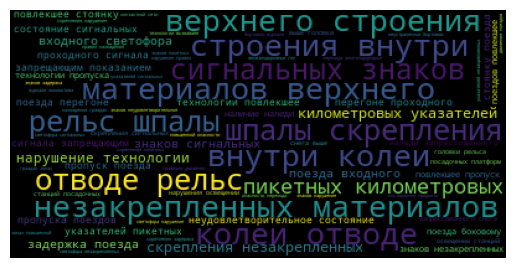

In [161]:
# Выводим облако слов на экран
plt.imshow(wordcloud)
# Отключаем отображение осей
plt.axis('off')

In [162]:

# pd.set_option("display.max_rows", None)
# df[df['status'] == 'На устранении']['responsible'].value_counts()

In [163]:
df['Дата нарушения'] = pd.to_datetime(df['Дата нарушения'], dayfirst=True)
df['Дата нарушения'] = df['Дата нарушения'].dt.date

In [164]:
df['Станция_2'] = df['Станция_2'].fillna('нет')

In [165]:
df['Станция_2'].value_counts() 

Станция_2
нет                         20100
РЕШЕТЫ                        783
МАСЛЯНСКАЯ                    702
ТИХАЯ                         702
НОВОАНДРЕЕВСКИЙ               648
САБИК                         544
АРАМИЛЬ                       526
СЕДЕЛЬНИКОВО                  478
ТАЛИЦА                        473
САРГА                         467
КАМЕНСК-УРАЛ                  457
БОЙЦЫ                         455
БОКОВАЯ                       444
ШАБЛЫКИНО                     442
СИМОНЯТА                      417
СЫЛВА                         373
ЧУПИНО                        358
КУЗИНО                        324
ЯРИНО                         320
МАЛЫЙ ОСТРОВ                  297
МЕНДЕЛЕЕВО                    276
КОСУЛИНО                      267
ЕРГАЧ                         266
ХРУСТАЛЬНАЯ                   265
КУХТЫМ                        263
БОГДАНОВИЧ                    250
ПЫТЬ-ЯХ                       244
КИШЕРТЬ                       242
КОУРОВКА                      236
ИШИМ

In [166]:
df = df.replace({'ФИО машиниста' : {'Шейко Н.А' : 'ШЕЙКО НА'}})

In [167]:
df['ФИО, депо'] = df['ФИО машиниста'].astype('str') + " " + df['Предприятие приписки бригады/очевидца'].astype('str')

In [168]:
# pd.set_option("display.max_rows", None)
# df2 = df['Тип замечания'].value_counts()
dfg1 = df.groupby(['Ответственное предпр.']).size().to_frame().sort_values([0], ascending = False).head(30).reset_index()
dfg1.columns = ['name', 'count']
dfg1

,name,count
0,ДЦУП ЕКАТЕРИНБУРГ (76),4626
1,ПЧ-13 ИШИМ (76),3665
2,ПЧ-4 ЛЕВШИНО (76),3470
3,ПЧ-5 КУЗИНО (76),3417
4,ПЧ-11 КАМЫШЛОВ (76),2549
5,ПЧ-7 ЕКАТЕРИНБУРГ (76),2397
6,ПЧ-2 ПЕРМЬ-2 (76),2247
7,ПЧ-1 ВЕРЕЩАГИНО (76),2064
8,ПЧ-3 КУНГУР (76),1651
9,ИЧ ЧУСОВСКАЯ П ЧУСОВОЙ (76),1441


In [169]:
fig = px.bar(dfg1, y='name', x='count', text_auto = True)
fig.layout.yaxis.title.text = 'отв.предпр'
fig.layout.xaxis.title.text = 'кол-во замеч.'
fig.update_layout(yaxis = {"categoryorder":"total ascending"})
fig.show()
fig.write_image("sp.svg", width=1200, height=600, scale=2)
fig.write_image("sp.png", width=1200, height=600, scale=2)

In [170]:
# pd.set_option("display.max_rows", None)
# df2 = df['Тип замечания'].value_counts()
dfg = df.groupby(['Тип замечания']).size().to_frame().sort_values([0], ascending = False).head(15).reset_index()
dfg.columns = ['name', 'count']
dfg

,name,count
0,Нахождение незакрепленных материалов верхнего ...,11723
1,Отсутствие сигнальных или путевых знаков,9140
2,Отсутствие пикетных и километровых указателей,5608
3,Задержка поезда у входного светофора,3823
4,Неудовлетворительное состояние сигнальных или ...,1998
5,"Нарушение технологии, повлекшее стоянку поезда...",1994
6,"Нарушение технологии пропуска поездов, повлекш...",1845
7,Наличие наледи и запрессованного снега выше го...,1692
8,"Нарушения в освещении станций, посадочных плат...",1220
9,Неустраненные замечания в бортовом журнале лок...,955


In [171]:
import plotly.express as px
# fig = px.histogram(dfg, x="Тип замечания")
# fig.show()
fig = px.bar(dfg, y='name', x='count', text_auto = True)
fig.layout.yaxis.title.text = 'тип замеч.'
fig.layout.xaxis.title.text = 'кол-во замеч.'
fig.update_layout(yaxis = {"categoryorder":"total ascending"})
fig.show()
fig.write_image("type.svg", width=1200, height=600, scale=2)
fig.write_image("type.png", width=1200, height=600, scale=2)

In [172]:
df['ФИО, депо'].value_counts().head(20)

ФИО, депо
ШЕЙКО НА ЭЧ-1 Пермь (76)                                       646
Гармаш Николай Андреевич ТЧПРИГ-21 ЕКАТЕРИНБУРГ (76)           428
Раков Анатолий Алексеевич ТЧЭ-17 ПЕРМЬ-СОРТ. (76)              395
Соболев Сергей Вячеславович ТЧЭ-5 СВЕРДЛОВСК-СОРТ. (76)        306
Тянгин Денис Александрович ТЧПРИГ-21 ЕКАТЕРИНБУРГ (76)         299
Быстров Александр Николаевич ТЧПРИГ-2 ПЕРМЬ-2 (76)             296
Головин Александр Владимирович ТЧПРИГ-21 ЕКАТЕРИНБУРГ (76)     296
Шипулин Николай Анатольевич ТЧПРИГ-21 ЕКАТЕРИНБУРГ (76)        283
Триполев П.А. ЭЧ-9 Серов (76)                                  259
МИКОВ АГ ПЧМ ПЕРМЬ ДПМ З-СИБ ПЕРМЬ (76)                        238
Гоглев Алексей Владимирович ТЧПРИГ-21 ЕКАТЕРИНБУРГ (76)        225
Фетисов Виктор Геннадьевич ТЧЭ-17 ПЕРМЬ-СОРТ. (76)             222
Бобров Максим Игоревич ТЧЭ-5 СВЕРДЛОВСК-СОРТ. (76)             210
Некрасов Антон Владимирович ТЧПРИГ-21 ЕКАТЕРИНБУРГ (76)        209
Мокрицкий Максим Владимирович ТЧПРИГ-2 ПЕРМЬ-2 (76) 

In [173]:
dfg2 = df.groupby(['ФИО, депо']).size().to_frame().sort_values([0], ascending = False).head(15).reset_index()
dfg2.columns = ['ФИО, депо', 'кол-во замеч']

In [174]:
import plotly.express as px
#df = px.data.tips()
# set(data[col].value_counts().index[:n])
fig = px.histogram(dfg2, y='ФИО, депо', x='кол-во замеч', text_auto = True)
# fig.update_layout(xaxis = {"categoryorder":"кол-во замеч"}) 
fig.layout.xaxis.title.text = 'кол-во замеч.'
fig.update_layout(yaxis = {"categoryorder":"total ascending"})
fig.show()
# fig.write_html("fio.html")
fig.write_image("fio.svg", width=1200, height=600, scale=2)
fig.write_image("fio.png", width=1200, height=600, scale=2)

In [175]:
dfg3 = df.groupby(['Предприятие приписки бригады/очевидца']).size().to_frame().sort_values([0], ascending = False).head(15).reset_index()
dfg3.columns = ['Депо', 'кол-во замеч']

In [176]:
fig = px.histogram(dfg3, y='Депо', x='кол-во замеч', text_auto = True)
fig.layout.xaxis.title.text = 'кол-во замеч.'
fig.update_layout(yaxis = {"categoryorder":"total ascending"})
fig.show()
# fig.write_html("fio.html")
fig.write_image("depo.svg", width=1200, height=600, scale=2)
fig.write_image("depo.png", width=1200, height=600, scale=2)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49965 entries, 0 to 49964
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Номер пакета ЗМ                             49965 non-null  int64  
 1   номер инцидента                             37091 non-null  float64
 2   Дата нарушения                              49965 non-null  object 
 3   Состояние пакета: состояние ЗМ              49965 non-null  object 
 4   Ответственное предпр.                       49965 non-null  object 
 5   Станция_1                                   49965 non-null  object 
 6   Станция_2                                   49965 non-null  object 
 7   Км                                          49965 non-null  int64  
 8   Пк                                          49965 non-null  int64  
 9   Путь                                        49965 non-null  object 
 10  Поезд     

In [178]:
dfg3 = df.groupby(['Тип замечания', 'Станция_1', 'Станция_2', 'Км']).size().to_frame().sort_values([0], ascending = False).head(1000).reset_index()
# dfg3.columns = ['Повтор', 'кол-во замеч']
dfg3.value_counts()

Тип замечания                                                                                                                     Станция_1        Станция_2        Км    0  
Видимое отклонении геометрических параметров рельсовой колеи по уровню или в плане                                                КОРДОН           ШАМАРЫ           1621  10     1
Отсутствие пикетных и километровых указателей                                                                                     ЛЯДЫ             СЫЛВА            44    23     1
                                                                                                                                  КОМАРИХИНСК      СЫЛВА            62    41     1
                                                                                                                                                                    64    22     1
                                                                                                              

In [179]:

# dfg4 = df[['Тип замечания', 'Станция_1', 'Станция_2', 'Км']]
# dfg4 = dfg4[dfg4.duplicated()]
dfc = df[['Тип замечания', 'Станция_1', 'Станция_2', 'Км']]
dfg4 = dfc[dfc.duplicated(['Тип замечания', 'Станция_1', 'Станция_2', 'Км'])]
# dfg4.groupby(['Тип замечания'])

dfg4 = pd.DataFrame(dfg4.value_counts().reset_index())
dfg4.columns = ['Тип замечания', 'Станция_1', 'Станция_2', 'Км', 'кол-во замеч']
dfg4.to_excel(r'C:\Users\Work\Documents\DataScience\IDE\WORK\duplicated.xlsx')

# pd.DataFrame(df['class'].value_counts()).reset_index()
# duplicate = df[df.duplicated(['Name', 'Age'])]

In [180]:
dfg4.groupby(['Тип замечания'])
dfg4 = pd.DataFrame(dfg4)
# dfg4 = pd.DataFrame(dfg4['кол-во замеч'].value_counts().head(30)).reset_index()
dfg4.to_excel(r'C:\Users\Work\Documents\DataScience\IDE\WORK\duplicated_gr.xlsx')
dfg4.head(15)

,Тип замечания,Станция_1,Станция_2,Км,кол-во замеч
0,Неустраненные замечания в бортовом журнале лок...,ДЕМЬЯНКА,нет,403,207
1,Задержка поезда у входного светофора,АРАМИЛЬ,нет,26,206
2,Задержка поезда у входного светофора,КОСУЛИНО,нет,1849,201
3,"Нарушение технологии пропуска поездов, повлекш...",КОКШАРОВСКИЙ,нет,1950,188
4,Отсутствие сигнальных или путевых знаков,ПЕРМЬ II,нет,1434,176
5,Задержка поезда у входного светофора,РЕШЕТЫ,нет,6,165
6,Нахождение незакрепленных материалов верхнего ...,ЕКАТЕРИН-ПАС,нет,1815,143
7,"Нарушения в освещении станций, посадочных плат...",ЕКАТЕРИН-ПАС,нет,1815,143
8,Неустраненные замечания в бортовом журнале лок...,ТОБОЛЬСК,нет,222,142
9,Отсутствие сигнальных или путевых знаков,МАСЛЯНСКАЯ,нет,2475,141


In [181]:
dfg5 = df.groupby(['Дата нарушения']).size().to_frame().sort_values([0], ascending = False).reset_index()
dfg5.columns = ['Дата', 'кол-во замеч']
dfg5['Дата'] = pd.to_datetime(dfg5['Дата'], dayfirst=True)
dfg5 = dfg5[dfg5['Дата'].dt.year > 2022]

In [182]:
dfg5

,Дата,кол-во замеч
0,2023-10-04,892
1,2023-12-05,881
2,2023-11-16,860
3,2023-12-14,848
4,2023-12-20,838
5,2023-11-09,825
6,2023-12-13,815
7,2023-12-06,803
8,2023-10-17,796
9,2023-11-14,796


In [183]:
fig = px.histogram(dfg5, x='Дата', y='кол-во замеч', text_auto = True, nbins = 15)
# fig.update_layout(xaxis = {"categoryorder":"кол-во замеч"}) 
fig.layout.yaxis.title.text = 'кол-во замеч.'
fig.update_layout(yaxis = {"categoryorder":"total ascending"})
fig.show()
# fig.write_html("fio.html")
fig.write_image("date.svg", width=1200, height=600, scale=2)
fig.write_image("date.png", width=1200, height=600, scale=2)

In [184]:
pd.set_option("display.max_rows", None)
df['Тип замечания'].value_counts()

Тип замечания
Нахождение незакрепленных материалов верхнего строения пути внутри колеи и на путевом отводе (рельс, шпалы, скрепления)                                                                                                                                                   11723
Отсутствие сигнальных или путевых знаков                                                                                                                                                                                                                                   9140
Отсутствие пикетных и километровых указателей                                                                                                                                                                                                                              5608
Задержка поезда у входного светофора                                                                                                                                      

In [185]:

remark = 'Обрыв струны контактной сети'
dfg6 = df[df['Тип замечания'] == remark]
dfg6 = dfg6[['Тип замечания', 'Станция_1', 'Станция_2', 'Км', 'Пк']]
dfg6 = dfg6[dfg6.duplicated(['Тип замечания', 'Станция_1', 'Станция_2', 'Км', 'Пк'])]
dfg6 = dfg6.groupby(['Станция_1', 'Станция_2', 'Км', 'Пк']).size().to_frame().sort_values([0], ascending = False).head(20).reset_index()
dfg6.columns = ['Станция_1', 'Станция_2', 'Км', 'Пк', 'кол-во замеч']
dfg6.to_excel(r'C:\Users\Work\Documents\DataScience\IDE\WORK\type_1.xlsx')
dfg6

,Станция_1,Станция_2,Км,Пк,кол-во замеч
0,КУЗИНО,САБИК,1715,2,20
1,КУЗИНО,САБИК,1726,2,9
2,КУЗИНО,САБИК,1713,2,6
3,КУЗИНО,КОУРОВКА,1732,6,6
4,БОЙЦЫ,КОУРОВКА,1742,4,6
5,РЕШЕТЫ,СЕДЕЛЬНИКОВО,21,8,5
6,КУЗИНО,нет,1728,2,5
7,ЧУПИНО,ЮШАЛА,2043,6,5
8,КУЗИНО,САБИК,1722,8,5
9,САБИК,КУЗИНО,1715,2,5


In [186]:
remark = 'Посторонние предметы на устройстве контроля схода подвижного состава (УКСПС)'
dfg7 = df[df['Тип замечания'] == remark]
dfg7 = dfg7[['Тип замечания', 'Станция_1', 'Станция_2', 'Км']]
dfg7 = dfg7[dfg7.duplicated(['Станция_1', 'Станция_2', 'Км'])]
dfg7 = dfg7.groupby(['Станция_1', 'Станция_2', 'Км']).size().to_frame().sort_values([0], ascending = False).head(20).reset_index()
dfg7.columns = ['Станция_1', 'Станция_2', 'Км', 'кол-во замеч']
dfg7.to_excel(r'C:\Users\Work\Documents\DataScience\IDE\WORK\type_2.xlsx')
dfg7

,Станция_1,Станция_2,Км,кол-во замеч
0,СЕВЕРКА,ХРУСТАЛЬНАЯ,1789,3
1,ОСТРОВНОЙ,ПП 668 КМ,672,3
2,ЗАГОТОВКА,БАСКАЯ,37,3
3,ЕРГАЧ,ИРЕНСКИЙ,1522,3
4,ГОЛОВАНОВО,АДИЩЕВО,24,2
5,СИВЫС-ЯХ,нет,531,2
6,СУРГУТ,нет,699,2
7,ТАНГИНСКИЙ,УСТЬ-ЮГАН,656,2
8,ХРУСТАЛЬНАЯ,ПЕРВОУРАЛЬСК,1775,2
9,ИГЛЬ,ПЫТЬ-ЯХ,624,2


In [187]:
remark = 'Неисправность стрелочных переводов'
dfg8 = df[df['Тип замечания'] == remark]
dfg8 = dfg8[['Тип замечания', 'Станция_1', 'Станция_2', 'Км', 'Пк', 'Путь']]
dfg8 = dfg8[dfg8.duplicated(['Станция_1', 'Станция_2', 'Км', 'Пк', 'Путь'])]
dfg8 = dfg8.groupby(['Станция_1', 'Станция_2', 'Км', 'Пк', 'Путь']).size().to_frame().sort_values([0], ascending = False).head(15).reset_index()
dfg8.columns = ['Станция_1', 'Станция_2', 'Км', 'Пк', 'Путь', 'кол-во замеч']
dfg8.to_excel(r'C:\Users\Work\Documents\DataScience\IDE\WORK\type_3.xlsx')
dfg8

,Станция_1,Станция_2,Км,Пк,Путь,кол-во замеч
0,ПОЛЕВСКОЙ,нет,58,2,1,51
1,ЕКАТЕРИН-С,нет,1649,5,1,8
2,ЕКАТЕРИН-С,нет,1649,5,30,7
3,АРАМИЛЬ,нет,26,3,10,6
4,ИШИМ,нет,2428,7,"Путь подъездной № 15(313,упор) на станции ИШИМ...",6
5,ЕКАТЕРИН-С,нет,1649,5,15,5
6,БЛОЧНАЯ,нет,6,2,12,4
7,КАМЕНСК-УРАЛ,нет,292,6,2,4
8,ВОЙНОВКА,нет,2147,9,1,4
9,ИШИМ,нет,2428,7,"ГП ИШИМ, Екатеринбург -Карбышево I 1 - 76",3


In [188]:
remark = 'Выплеск пути'
dfg9 = df[df['Тип замечания'] == remark]
dfg9 = dfg9[['Тип замечания', 'Станция_1', 'Станция_2', 'Км', 'Пк']]
dfg9 = dfg9[dfg9.duplicated(['Станция_1', 'Станция_2', 'Км', 'Пк'])]
dfg9 = dfg9.groupby(['Станция_1', 'Станция_2', 'Км', 'Пк']).size().to_frame().sort_values([0], ascending = False).head(15).reset_index()
dfg9.columns = ['Станция_1', 'Станция_2', 'Км', 'Пк', 'кол-во замеч']
dfg9.to_excel(r'C:\Users\Work\Documents\DataScience\IDE\WORK\type_4.xlsx')
dfg9

,Станция_1,Станция_2,Км,Пк,кол-во замеч
0,ФЕРМА,нет,1453,7,16
1,МУЛЯНКА,нет,1465,2,13
2,ОВЕРЯТА,нет,1,0,11
3,ЕРГАЧ,нет,1512,4,4
4,ЛЕК,нет,1594,10,3
5,КУКУШТАН,нет,1487,3,3
6,МЕНДЕЛЕЕВО,нет,1341,5,3
7,ШУМКОВО,нет,1570,2,3
8,ГРИГОРЬЕВСКАЯ,нет,1369,10,3
9,БОРОДУЛИНО,нет,1292,3,3
